In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import sklearn
from matplotlib import style
style.use('ggplot')
import datetime as dt

In [2]:
style

<module 'matplotlib.style' from 'D:\\Anaconda3\\lib\\site-packages\\matplotlib\\style\\__init__.py'>

In [2]:
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2016, 12, 31)

df = web.DataReader('TSLA', 'yahoo', start, end)
print(df.head())
print(df.tail())

             High    Low   Open  Close    Volume  Adj Close
Date                                                       
2010-06-29  5.000  3.508  3.800  4.778  93831500      4.778
2010-06-30  6.084  4.660  5.158  4.766  85935500      4.766
2010-07-01  5.184  4.054  5.000  4.392  41094000      4.392
2010-07-02  4.620  3.742  4.600  3.840  25699000      3.840
2010-07-06  4.000  3.166  4.000  3.222  34334500      3.222
                 High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2016-12-23  42.689999  41.542000  41.599998  42.667999  23352500  42.667999
2016-12-27  44.450001  42.883999  42.976002  43.905998  29578500  43.905998
2016-12-28  44.759998  43.439999  44.306000  43.948002  18912500  43.948002
2016-12-29  43.840000  42.824001  43.712002  42.936001  20225000  42.936001
2016-12-30  43.500000  42.335999  43.259998  42.737999  23213000  42.737999


In [4]:
df.to_csv('Datasets/tsla.csv')

In [3]:
df = pd.read_csv('Datasets/tsla.csv', parse_dates=True, index_col=0)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222


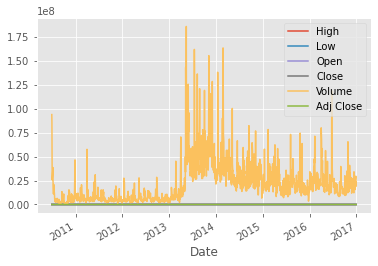

In [6]:
df.plot()
plt.show()

In [7]:
print(df[['Open', 'Close']].head())

             Open  Close
Date                    
2010-06-29  3.800  4.778
2010-06-30  5.158  4.766
2010-07-01  5.000  4.392
2010-07-02  4.600  3.840
2010-07-06  4.000  3.222


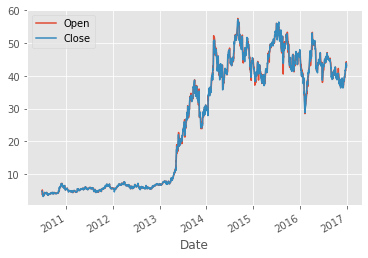

In [8]:
df[['Open', 'Close']].plot()

In [10]:
df['100ma']= df['Adj Close'].rolling(window=100).mean() 

In [11]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778,NaN
2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766,NaN
2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392,NaN
2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840,NaN
2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222,NaN


In [13]:
df['100ma']= df['Adj Close'].rolling(window=100, min_periods=0).mean() 

In [14]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778,4.778000
2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766,4.772000
2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392,4.645333
2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840,4.444000
2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222,4.199600


In [8]:
df.dropna(inplace=True)

In [9]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-11-17,6.150,5.722,6.040,5.898,3750000,5.898,4.19758
2010-11-18,6.148,5.784,6.134,5.978,4780500,5.978,4.20958
2010-11-19,6.274,5.940,6.032,6.198,5752500,6.198,4.22390
2010-11-22,6.690,6.300,6.314,6.680,7648500,6.680,4.24678
2010-11-23,7.136,6.438,6.658,6.914,7889000,6.914,4.27752


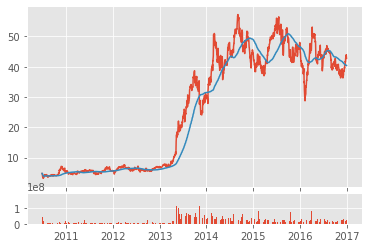

In [15]:
ax1= plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2= plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

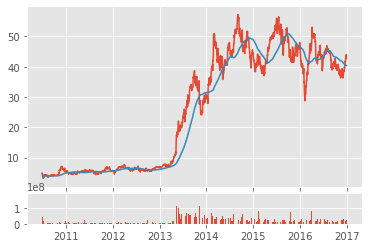

In [16]:
ax1= plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2= plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1, sharex=ax1) # sharex shares x axis commonly

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import sklearn
from matplotlib import style
style.use('ggplot')
import datetime as dt

In [7]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

In [24]:
print(df_ohlc.head(20))

             open   high    low  close
Date                                  
2010-06-29  4.778  4.778  3.160  3.492
2010-07-09  3.480  4.128  3.410  4.128
2010-07-19  4.382  4.382  4.044  4.144
2010-07-29  4.070  4.390  3.918  3.918
2010-08-08  3.920  3.920  3.520  3.830
2010-08-18  3.754  4.026  3.754  3.940
2010-08-28  3.974  4.212  3.896  4.210
2010-09-07  4.108  4.396  4.034  4.188
2010-09-17  4.046  4.212  3.912  4.020
2010-09-27  4.106  4.396  4.082  4.092
2010-10-07  4.086  4.150  4.048  4.108
2010-10-17  4.046  4.272  4.010  4.272
2010-10-27  4.200  4.980  4.200  4.888
2010-11-06  4.996  6.160  4.926  6.160
2010-11-16  5.934  7.094  5.898  7.094
2010-11-26  7.064  7.066  6.298  6.298
2010-12-06  6.062  6.474  5.706  5.920
2010-12-16  6.162  6.526  6.018  6.018
2010-12-26  5.110  5.546  5.110  5.334
2011-01-05  5.366  5.690  5.150  5.150


In [25]:
df_ohlc.reset_index(inplace=True)

In [26]:
df_ohlc.Date.dtypes

dtype('<M8[ns]')

In [27]:
df_ohlc.Date = pd.to_datetime(df_ohlc['Date'])

In [28]:
df_ohlc.Date = df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc.head())

       Date   open   high    low  close
0  733952.0  4.778  4.778  3.160  3.492
1  733962.0  3.480  4.128  3.410  4.128
2  733972.0  4.382  4.382  4.044  4.144
3  733982.0  4.070  4.390  3.918  3.918
4  733992.0  3.920  3.920  3.520  3.830


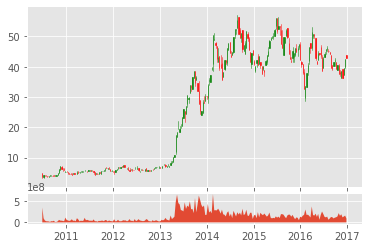

In [30]:
ax1= plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2= plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

In [9]:
import bs4 as bs
import pickle
import requests

def save_snp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open("sp500tickers.pickle", 'wb') as f:
        pickle.dump(tickers, f)
        
    print(tickers)
    
    return tickers

save_snp500_tickers()

['MMM\n', 'ABT\n', 'ABBV\n', 'ABMD\n', 'ACN\n', 'ATVI\n', 'ADBE\n', 'AMD\n', 'AAP\n', 'AES\n', 'AFL\n', 'A\n', 'APD\n', 'AKAM\n', 'ALK\n', 'ALB\n', 'ARE\n', 'ALXN\n', 'ALGN\n', 'ALLE\n', 'LNT\n', 'ALL\n', 'GOOGL\n', 'GOOG\n', 'MO\n', 'AMZN\n', 'AMCR\n', 'AEE\n', 'AAL\n', 'AEP\n', 'AXP\n', 'AIG\n', 'AMT\n', 'AWK\n', 'AMP\n', 'ABC\n', 'AME\n', 'AMGN\n', 'APH\n', 'ADI\n', 'ANSS\n', 'ANTM\n', 'AON\n', 'AOS\n', 'APA\n', 'AAPL\n', 'AMAT\n', 'APTV\n', 'ADM\n', 'ANET\n', 'AJG\n', 'AIZ\n', 'T\n', 'ATO\n', 'ADSK\n', 'ADP\n', 'AZO\n', 'AVB\n', 'AVY\n', 'BKR\n', 'BLL\n', 'BAC\n', 'BK\n', 'BAX\n', 'BDX\n', 'BRK.B\n', 'BBY\n', 'BIO\n', 'BIIB\n', 'BLK\n', 'BA\n', 'BKNG\n', 'BWA\n', 'BXP\n', 'BSX\n', 'BMY\n', 'AVGO\n', 'BR\n', 'BF.B\n', 'CHRW\n', 'COG\n', 'CDNS\n', 'CZR\n', 'CPB\n', 'COF\n', 'CAH\n', 'KMX\n', 'CCL\n', 'CARR\n', 'CTLT\n', 'CAT\n', 'CBOE\n', 'CBRE\n', 'CDW\n', 'CE\n', 'CNC\n', 'CNP\n', 'CERN\n', 'CF\n', 'CRL\n', 'SCHW\n', 'CHTR\n', 'CVX\n', 'CMG\n', 'CB\n', 'CHD\n', 'CI\n', 'CINF\n', 'C

['MMM\n',
 'ABT\n',
 'ABBV\n',
 'ABMD\n',
 'ACN\n',
 'ATVI\n',
 'ADBE\n',
 'AMD\n',
 'AAP\n',
 'AES\n',
 'AFL\n',
 'A\n',
 'APD\n',
 'AKAM\n',
 'ALK\n',
 'ALB\n',
 'ARE\n',
 'ALXN\n',
 'ALGN\n',
 'ALLE\n',
 'LNT\n',
 'ALL\n',
 'GOOGL\n',
 'GOOG\n',
 'MO\n',
 'AMZN\n',
 'AMCR\n',
 'AEE\n',
 'AAL\n',
 'AEP\n',
 'AXP\n',
 'AIG\n',
 'AMT\n',
 'AWK\n',
 'AMP\n',
 'ABC\n',
 'AME\n',
 'AMGN\n',
 'APH\n',
 'ADI\n',
 'ANSS\n',
 'ANTM\n',
 'AON\n',
 'AOS\n',
 'APA\n',
 'AAPL\n',
 'AMAT\n',
 'APTV\n',
 'ADM\n',
 'ANET\n',
 'AJG\n',
 'AIZ\n',
 'T\n',
 'ATO\n',
 'ADSK\n',
 'ADP\n',
 'AZO\n',
 'AVB\n',
 'AVY\n',
 'BKR\n',
 'BLL\n',
 'BAC\n',
 'BK\n',
 'BAX\n',
 'BDX\n',
 'BRK.B\n',
 'BBY\n',
 'BIO\n',
 'BIIB\n',
 'BLK\n',
 'BA\n',
 'BKNG\n',
 'BWA\n',
 'BXP\n',
 'BSX\n',
 'BMY\n',
 'AVGO\n',
 'BR\n',
 'BF.B\n',
 'CHRW\n',
 'COG\n',
 'CDNS\n',
 'CZR\n',
 'CPB\n',
 'COF\n',
 'CAH\n',
 'KMX\n',
 'CCL\n',
 'CARR\n',
 'CTLT\n',
 'CAT\n',
 'CBOE\n',
 'CBRE\n',
 'CDW\n',
 'CE\n',
 'CNC\n',
 'CNP\n',
 'CERN

In [10]:
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web

!pip install yfinance
!pip install fix_yahoo_finance

import yfinance as yf
yf.pdr_override()

def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_snp500_tickers()
    else:
        with open('sp500tickers.pickle', 'rb') as f:
            tickers = pickle.load(f)
            
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    
    start = dt.datetime(2000,1,1)
    end = dt.datetime(2016,12,31)
    
    for ticker in tickers:
        if not os.path.exists('stock_dfs/{}.csv'.format(tickers)):
            df = web.DataReader(ticker, 'yahoo', start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}.format(ticker)')
            
get_data_from_yahoo()
     


stock_df =  pd.read_csv('stock_dfs/dataset.csv')
stock_df.head()

def compile_data():
    with open("sptickers.pickle", 'rb') as f:
        tickers = pickle.load(f)
    
    main_df = pd.DataFrame()
    
    for count, ticker in enumerate(tickers):
        df = pd.read_csv('stock_df/{}.csv'.format(ticker))
        df._set_index('Date', inplace=True)
        
        df.rename(columns = {'Adj Close': ticker}, inplace=true)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
        
        if main_df.empty:
            main_df = df
        else
        main_df = main_df.join(df, how='outer')
        
        if count%10 == 0:
            print(count)
            
    
    print(main_df.head)
    main_df.tocsv('sp500.csv')

In [16]:
stock_df =  pd.read_csv('Datasets/sp500.csv', header=[0,1])
stock_df.head()

Unnamed: 0_level_0        A                                    AAL         \
    Unnamed: 0_level_1     open   high      low  close   volume   open   high   
0            timestamp      NaN    NaN      NaN    NaN      NaN    NaN    NaN   
1  2017-09-11 09:30:00      NaN    NaN      NaN    NaN      NaN  44.01  44.05   
2  2017-09-11 09:31:00  65.5000  65.50  65.4100  65.46  29852.0  44.01  44.25   
3  2017-09-11 09:32:00  65.4604  65.66  65.4604  65.66   3435.0  44.25  44.32   
4  2017-09-11 09:33:00  65.6700  65.70  65.6200  65.69    700.0  44.28  44.46   

                   ...   ZION                                   ZTS         \
       low  close  ...   open   high    low  close   volume    open   high   
0      NaN    NaN  ...    NaN    NaN    NaN    NaN      NaN     NaN    NaN   
1  44.0100  44.01  ...  42.05  42.05  42.04  42.04  26933.0     NaN    NaN   
2  44.0000  44.25  ...  42.06  42.54  42.01  42.24  39292.0  65.330  65.39   
3  44.2200  44.27  ...  42.12  42.48  42.09  42.48   9683.0  65.115  65.23   
4  44.2504  44.34  ...  42.49  42.49  42.18  42.20   7844.0     NaN    NaN   

                           
      low  close   volume  
0     NaN    NaN      NaN  
1     NaN    NaN      NaN  
2  64.960  65.11  38144.0  
3  65.075  65.12   4390.0  
4     NaN    NaN      NaN  

[5 rows x 2511 columns]

In [17]:
stock_df.drop(index=0, axis=0, inplace=True)

In [18]:
stock_df.rename(columns = {'Unnamed: 0_level_0': 'Date'}, inplace=True)

In [ ]:
stock_df= stock_df.set_index('Date')

In [49]:
stock_df.columns[0]

('A', 'open')

In [50]:
main_df = pd.DataFrame()
for columns in stock_df.columns: 
    main_df[columns[0]] = stock_df[columns[0]].close

In [51]:
main_df.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
"(2017-09-11 09:30:00,)",NaN,44.01,NaN,160.5700,84.530,83.24,NaN,134.00,156.590,80.810,...,41.050,64.0400,79.410,58.7600,31.7500,63.07,76.82,116.25,42.04,NaN
"(2017-09-11 09:31:00,)",65.46,44.25,93.565,160.5100,84.555,82.89,52.4300,134.45,156.995,81.260,...,41.950,64.1833,79.410,58.6527,31.6900,63.16,76.84,116.25,42.24,65.11
"(2017-09-11 09:32:00,)",65.66,44.27,94.060,160.3200,84.940,NaN,52.5000,134.53,156.850,81.185,...,42.235,64.0200,79.120,NaN,31.6997,62.80,76.90,116.74,42.48,65.12
"(2017-09-11 09:33:00,)",65.69,44.34,NaN,160.1500,84.990,83.06,52.4986,134.61,156.780,81.440,...,41.900,64.0900,79.190,58.8700,31.7400,62.88,76.89,116.27,42.20,NaN
"(2017-09-11 09:34:00,)",65.88,44.24,94.095,160.2799,84.800,83.09,52.5000,134.81,156.890,81.480,...,41.900,64.0350,79.155,58.8400,31.8000,62.85,76.85,116.29,42.38,64.97


In [54]:
main_df.to_csv('Datasets/sp500_close.csv')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import sklearn
from matplotlib import style
style.use('ggplot')
import datetime as dt

In [2]:
main_df = pd.read_csv('Datasets/sp500_close.csv')

In [3]:
main_df.set_index('Date', inplace=True)

In [4]:
main_df.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
"('2017-09-11 09:30:00',)",NaN,44.01,NaN,160.5700,84.530,83.24,NaN,134.00,156.590,80.810,...,41.050,64.0400,79.410,58.7600,31.7500,63.07,76.82,116.25,42.04,NaN
"('2017-09-11 09:31:00',)",65.46,44.25,93.565,160.5100,84.555,82.89,52.4300,134.45,156.995,81.260,...,41.950,64.1833,79.410,58.6527,31.6900,63.16,76.84,116.25,42.24,65.11
"('2017-09-11 09:32:00',)",65.66,44.27,94.060,160.3200,84.940,NaN,52.5000,134.53,156.850,81.185,...,42.235,64.0200,79.120,NaN,31.6997,62.80,76.90,116.74,42.48,65.12
"('2017-09-11 09:33:00',)",65.69,44.34,NaN,160.1500,84.990,83.06,52.4986,134.61,156.780,81.440,...,41.900,64.0900,79.190,58.8700,31.7400,62.88,76.89,116.27,42.20,NaN
"('2017-09-11 09:34:00',)",65.88,44.24,94.095,160.2799,84.800,83.09,52.5000,134.81,156.890,81.480,...,41.900,64.0350,79.155,58.8400,31.8000,62.85,76.85,116.29,42.38,64.97


In [5]:
main_df = main_df.dropna()
main_df.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
"('2017-09-11 15:39:00',)",66.1200,45.75,94.37,161.4350,86.59,84.410,52.390,136.100,156.68,82.4300,...,40.685,64.825,79.225,59.3650,32.08,62.99,77.710,115.90,42.6700,65.2362
"('2017-09-11 15:40:00',)",66.1399,45.76,94.42,161.4486,86.65,84.435,52.419,136.170,156.73,82.4500,...,40.675,64.830,79.230,59.3800,32.09,62.99,77.775,115.91,42.6400,65.2600
"('2017-09-11 15:45:00',)",66.1000,45.82,94.35,161.4498,86.75,84.400,52.425,136.090,156.76,82.3968,...,40.650,64.770,79.210,59.3650,32.05,62.97,77.750,115.88,42.6607,65.2500
"('2017-09-11 15:46:00',)",66.0900,45.79,94.36,161.2886,86.75,84.280,52.395,136.080,156.73,82.3300,...,40.635,64.760,79.200,59.3699,32.06,62.94,77.700,115.86,42.6750,65.2200
"('2017-09-11 15:50:00',)",66.1000,45.80,94.39,161.2600,86.81,84.385,52.420,136.031,156.87,82.2500,...,40.530,64.820,79.205,59.3400,32.07,63.01,77.620,115.82,42.6600,65.2200


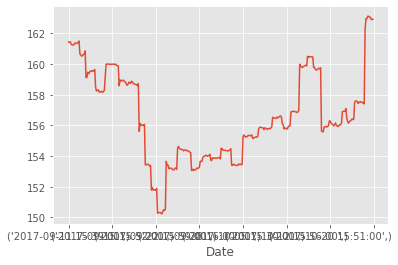

In [6]:
df = main_df
df['AAPL'].plot()
plt.show()

In [7]:
df_corr = df.corr()
print(df_corr.head())

             A       AAL       AAP      AAPL      ABBV       ABC       ABT  \
A     1.000000  0.440555 -0.859419  0.530232  0.572751 -0.458847  0.561980   
AAL   0.440555  1.000000 -0.643466 -0.123183  0.763880 -0.113951  0.843799   
AAP  -0.859419 -0.643466  1.000000 -0.304374 -0.698792  0.465964 -0.780566   
AAPL  0.530232 -0.123183 -0.304374  1.000000  0.136439 -0.223035 -0.004169   
ABBV  0.572751  0.763880 -0.698792  0.136439  1.000000 -0.134639  0.849557   

           ACN      ADBE       ADI  ...        XL      XLNX       XOM  \
A     0.712470  0.761789  0.651978  ...  0.699754  0.337646  0.452066   
AAL   0.298128  0.149783  0.737561  ...  0.528320  0.754134  0.745162   
AAP  -0.840155 -0.683906 -0.845565  ... -0.758270 -0.581861 -0.737639   
AAPL  0.223688  0.468590  0.057112  ...  0.410323 -0.223394 -0.084249   
ABBV  0.372802  0.511209  0.707966  ...  0.750002  0.607130  0.716482   

          XRAY       XRX       XYL       YUM       ZBH      ZION       ZTS  
A     0.344585 

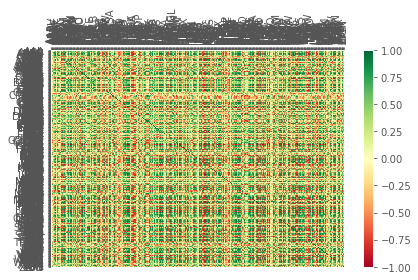

In [14]:
data = df_corr.values
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

heatmap = ax.pcolor(data, cmap = plt.cm.RdYlGn)
fig.colorbar(heatmap)
ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()

column_labels = df_corr.columns
row_labels = df_corr.index

ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)
plt.xticks(rotation=90)
heatmap.set_clim(-1,1)
plt.tight_layout()
plt.show()

# Scenario: compare a company's relaitonship with other companies movement on trade.
# compare few days of trade and manipulate buy (up by 2%), sell (down by 2%) or hold the company/shares.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import sklearn
from matplotlib import style
style.use('ggplot')
import datetime as dt
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_validate
from sklearn import svm, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

In [3]:
def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('Datasets/sp500_close.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    
    for i in range(1, hm_days+1):
        df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(-i) - df[ticker] / df[ticker])
    
    df.fillna(0, inplace=True)
#     print(df.tail())
    return tickers, df

process_data_for_labels('XOM')
    
        

(['A',
  'AAL',
  'AAP',
  'AAPL',
  'ABBV',
  'ABC',
  'ABT',
  'ACN',
  'ADBE',
  'ADI',
  'ADM',
  'ADP',
  'ADS',
  'ADSK',
  'AEE',
  'AEP',
  'AES',
  'AET',
  'AFL',
  'AGN',
  'AIG',
  'AIV',
  'AIZ',
  'AJG',
  'AKAM',
  'ALB',
  'ALGN',
  'ALK',
  'ALL',
  'ALLE',
  'ALXN',
  'AMAT',
  'AMD',
  'AME',
  'AMG',
  'AMGN',
  'AMP',
  'AMT',
  'AMZN',
  'ANDV',
  'ANSS',
  'ANTM',
  'AON',
  'AOS',
  'APA',
  'APC',
  'APD',
  'APH',
  'ARE',
  'ARNC',
  'ATVI',
  'AVB',
  'AVGO',
  'AVY',
  'AWK',
  'AXP',
  'AYI',
  'AZO',
  'BA',
  'BAC',
  'BAX',
  'BBT',
  'BBY',
  'BDX',
  'BEN',
  'BF.B',
  'BHF',
  'BHGE',
  'BIIB',
  'BK',
  'BLK',
  'BLL',
  'BMY',
  'BRK.B',
  'BSX',
  'BWA',
  'BXP',
  'C',
  'CA',
  'CAG',
  'CAH',
  'CAT',
  'CB',
  'CBG',
  'CBOE',
  'CBS',
  'CCI',
  'CCL',
  'CDNS',
  'CELG',
  'CERN',
  'CF',
  'CFG',
  'CHD',
  'CHK',
  'CHRW',
  'CHTR',
  'CI',
  'CINF',
  'CL',
  'CLX',
  'CMA',
  'CMCSA',
  'CME',
  'CMG',
  'CMI',
  'CMS',
  'CNC',
  'CNP',

In [5]:
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0    

In [6]:
from collections import Counter

def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)
    
    df['{}_target'.format(ticker)] = list(map(buy_sell_hold, 
                                             df['{}_1d'.format(ticker)],
                                             df['{}_2d'.format(ticker)],
                                             df['{}_3d'.format(ticker)],
                                             df['{}_4d'.format(ticker)],
                                             df['{}_5d'.format(ticker)],
                                             df['{}_6d'.format(ticker)],
                                             df['{}_7d'.format(ticker)],
                                             ))
    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data Spread: ', Counter(str_vals))
    
    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    
    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)
    
    X = df_vals.values
    y=df['{}_target'.format(ticker)].values
    
    return X, y , df

extract_featuresets('XOM')

Data Spread:  Counter({'1': 42827, '0': 252, '-1': 67})


(array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  5.45330607e-03,  0.00000000e+00, ...,
          0.00000000e+00,  4.75737393e-03,  0.00000000e+00],
        [ 3.05530095e-03,  4.51977401e-04,  5.29043980e-03, ...,
          4.21505376e-03,  5.68181818e-03,  1.53586239e-04],
        ...,
        [-1.38753989e-04, -3.86324126e-04,  1.85408362e-04, ...,
         -2.48364931e-04, -6.34230316e-04,  6.26566416e-05],
        [-6.93866223e-04, -9.66183575e-04, -7.41495968e-04, ...,
         -1.65617754e-04,  7.25294651e-04, -1.87958148e-04],
        [-5.69365366e-04, -1.35396518e-03, -5.79723588e-04, ...,
         -5.79758158e-04, -6.34172857e-04, -1.25328989e-04]]),
 array([1, 1, 1, ..., 1, 1, 0], dtype=int64),
                                A    AAL       AAP      AAPL      ABBV    ABC  \
 Date                                                                           
 ('2017-09-11 09:30:0

In [11]:
from sklearn.model_selection import KFold

X, y, data = extract_featuresets('BAC')

kfold = KFold(3, True, 1)

# enumerate splits
for train, test in kfold.split(data):
    print('train: %s, test: %s' % (train, test))  

# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold
# data sample
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# prepare cross validation
kfold = KFold(3, True, 1)
# enumerate splits
for train, test in kfold.split(data):
    print('train: %s, test: %s' % (data[train], data[test]))


Data Spread:  Counter({'1': 42887, '0': 222, '-1': 37})


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


train: [    0     1     4 ... 43143 43144 43145], test: [    2     3     8 ... 43135 43136 43141]
train: [    1     2     3 ... 43143 43144 43145], test: [    0     4     5 ... 43139 43140 43142]
train: [    0     2     3 ... 43140 43141 43142], test: [    1     9    14 ... 43143 43144 43145]
train: [0.1 0.4 0.5 0.6], test: [0.2 0.3]
train: [0.2 0.3 0.4 0.6], test: [0.1 0.5]
train: [0.1 0.2 0.3 0.5], test: [0.4 0.6]


In [7]:
def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 )
    clf = neighbors.KNeighborsClassifier()
    
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('Accuracy:', confidence)
    predictions = clf.predict(X_test)
    print("Predicted spread: ", Counter(predictions))
    
    return confidence

do_ml('BAC')

Data Spread:  Counter({'1': 42887, '0': 222, '-1': 37})
Accuracy: 0.9743209418744785
Predicted spread:  Counter({1: 10462, 0: 325})


0.9743209418744785

In [15]:
def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
#     clf = neighbors.KNeighborsClassifier()
    clf = VotingClassifier([('lsvc', svm.LinearSVC()),
                            ('knn', neighbors.KNeighborsClassifier()),
                            ('R_for', RandomForestClassifier())])
    
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('Accuracy:', confidence)
    predictions = clf.predict(X_test)
    print("Predicted spread: ", Counter(predictions))
    
    return confidence

do_ml('BAC')

                               A    AAL       AAP    AAPL      ABBV    ABC  \
Date                                                                         
('2018-02-16 15:55:00',)  72.125  51.76  107.8500  172.89  118.9300  99.52   
('2018-02-16 15:56:00',)  72.070  51.77  107.8700  172.87  118.9100  99.51   
('2018-02-16 15:57:00',)  72.060  51.75  107.8900  172.76  118.8001  99.50   
('2018-02-16 15:58:00',)  72.010  51.70  107.8100  172.63  118.7350  99.44   
('2018-02-16 15:59:00',)  71.969  51.63  107.7475  172.54  118.7600  99.46   

                              ABT     ACN    ADBE    ADI  ...     ZBH    ZION  \
Date                                                      ...                   
('2018-02-16 15:55:00',)  60.4000  163.14  202.22  86.27  ...  120.81  55.180   
('2018-02-16 15:56:00',)  60.4200  163.11  202.13  86.25  ...  120.79  55.185   
('2018-02-16 15:57:00',)  60.4200  163.08  202.04  86.26  ...  120.76  55.150   
('2018-02-16 15:58:00',)  60.3949  163.03  201.9

0.9984240289237044